In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree, metrics
import graphviz 
import os

In [2]:
# Load the dataset
heart_data = pd.read_csv("../input/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
# Correlation between the features
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


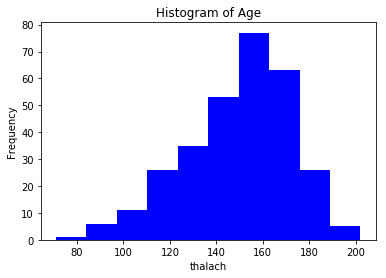

In [7]:
plt.hist(heart_data['thalach'], bins = 10, color = 'blue')
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [8]:
for index,value in zip(heart_data['sex'].value_counts().index, heart_data['sex'].value_counts()):
    print('Class {} =>  {} ({:.2f}%)'.format(index, value, (value/heart_data.shape[0]*100)))

Class 1 =>  207 (68.32%)
Class 0 =>  96 (31.68%)


In [9]:
# Convert continous data into categorial data
def label_data(feature_data):
    mean = feature_data.mean()
    first = feature_data.min()
    second = (first + mean)/2
    third = (feature_data.max() + mean)/2
    return feature_data.apply(label, args = (first, second, third))
    
def label(val, *boundries):
    if val < boundries[0]:
        val = 1
    elif val < boundries[1]:
        val = 2
    elif val < boundries[2]:
        val = 3
    else:
        val = 4
    return val

In [10]:
heart_data['thalach'] = label_data(heart_data['thalach'])
heart_data['trestbps'] = label_data(heart_data['trestbps'])
heart_data['chol'] = label_data(heart_data['chol'])
heart_data['oldpeak'] = label_data(heart_data['oldpeak'])
heart_data['age'] = label_data(heart_data['age'])

In [11]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,3,3,1,0,3,0,3,0,0,1,1
1,2,1,2,3,3,0,1,4,0,3,0,0,2,1
2,2,0,1,3,3,0,0,3,0,3,2,0,2,1
3,3,1,1,3,3,0,1,4,0,3,2,0,2,1
4,3,0,0,3,3,0,1,3,1,3,2,0,2,1
5,3,1,0,3,3,0,1,3,0,2,1,0,1,1
6,3,0,1,3,3,0,0,3,0,3,1,0,2,1
7,3,1,1,3,3,0,1,3,0,2,2,0,3,1
8,3,1,2,4,3,1,1,3,0,2,2,0,3,1
9,3,1,2,3,2,0,1,3,0,3,2,0,2,1


In [12]:
# Segregate data and target
data = heart_data.iloc[:,0:13]
target = heart_data.iloc[:,13]
data.shape, target.shape

((303, 13), (303,))

In [13]:
# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((227, 13), (227,), (76, 13), (76,))

In [15]:
# Get list of all the features in the dataset
features = x_train.columns

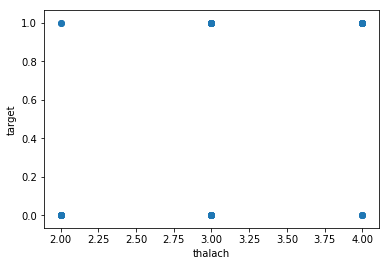

In [16]:
plt.scatter(x_train['thalach'], y_train)
plt.xlabel('thalach');
plt.ylabel('target')
plt.show()

In [17]:
# Calculate Gini Index for all the features
def gini_impurity(data, total):
    gini_split = 0
    for cat in data:
        gini_split += (data[cat]/total)**2
    gini_index = 1 - gini_split
    return gini_index

In [18]:
for feature in features:
    impurity = gini_impurity(Counter(x_train[feature]), x_train.shape[0])
    print('Impurity at {} node is: {}'.format(feature, impurity))

Impurity at age node is: 0.3436899609928389
Impurity at sex node is: 0.4331541462089309
Impurity at cp node is: 0.6628888587009257
Impurity at trestbps node is: 0.3590211337305207
Impurity at chol node is: 0.18374119427894964
Impurity at fbs node is: 0.25469153292320845
Impurity at restecg node is: 0.5115565991965688
Impurity at thalach node is: 0.26493819014535513
Impurity at exang node is: 0.4363368200430825
Impurity at oldpeak node is: 0.529061305284403
Impurity at slope node is: 0.5627898853073028
Impurity at ca node is: 0.6072308796988103
Impurity at thal node is: 0.5313124648256322


In [19]:
# Find appropriate max_depth for classification
for depth in range(1,20):
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth=depth)
    model = tree_model.fit(X = x_train, y = y_train)   
    valid_acc = tree_model.score(X = x_test, y = y_test)
    print('Accuracy for depth {} is {}'.format(depth, valid_acc))

Accuracy for depth 1 is 0.6973684210526315
Accuracy for depth 2 is 0.7763157894736842
Accuracy for depth 3 is 0.8026315789473685
Accuracy for depth 4 is 0.8026315789473685
Accuracy for depth 5 is 0.8026315789473685
Accuracy for depth 6 is 0.7894736842105263
Accuracy for depth 7 is 0.7631578947368421
Accuracy for depth 8 is 0.8289473684210527
Accuracy for depth 9 is 0.8026315789473685
Accuracy for depth 10 is 0.7894736842105263
Accuracy for depth 11 is 0.8157894736842105
Accuracy for depth 12 is 0.8026315789473685
Accuracy for depth 13 is 0.8026315789473685
Accuracy for depth 14 is 0.7894736842105263
Accuracy for depth 15 is 0.8289473684210527
Accuracy for depth 16 is 0.8289473684210527
Accuracy for depth 17 is 0.7894736842105263
Accuracy for depth 18 is 0.8026315789473685
Accuracy for depth 19 is 0.8026315789473685


In [20]:
# Train Model
tree_model = tree.DecisionTreeClassifier(max_depth = 6)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
y_pred = tree_model.predict(x_test)

In [22]:
print('Accuracy is: ',metrics.accuracy_score(y_test,y_pred))

Accuracy is:  0.7894736842105263


In [23]:
os.environ["PATH"] += os.pathsep + 'C:/Users/pc/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin/graphviz'

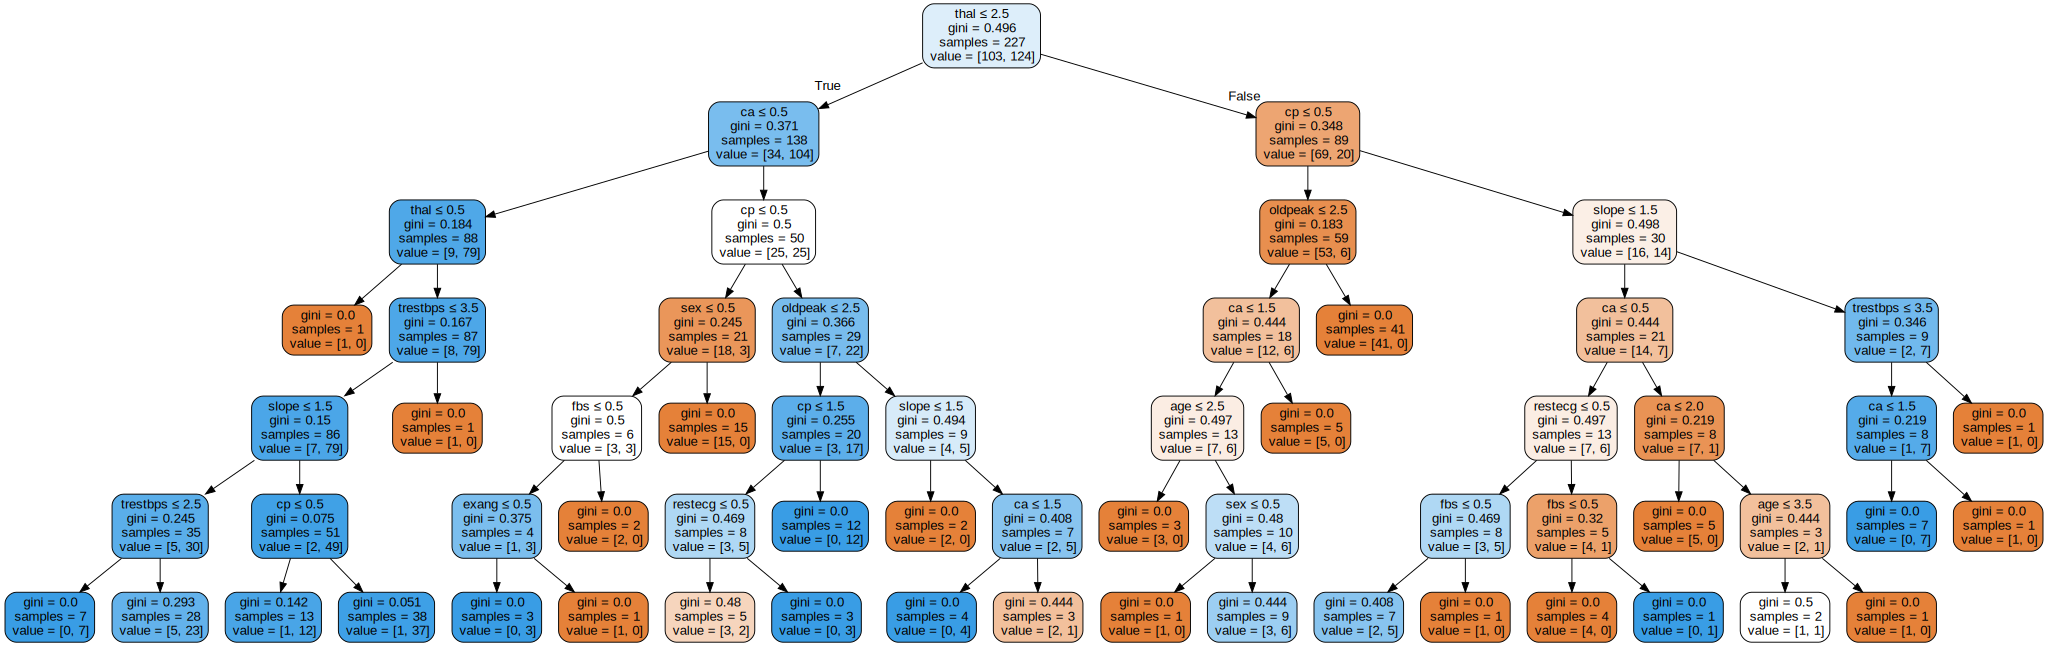

In [24]:
dot_data = export_graphviz(tree_model, out_file=None, 
                         feature_names=features, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph